💡 Question-1:

Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.

Example:
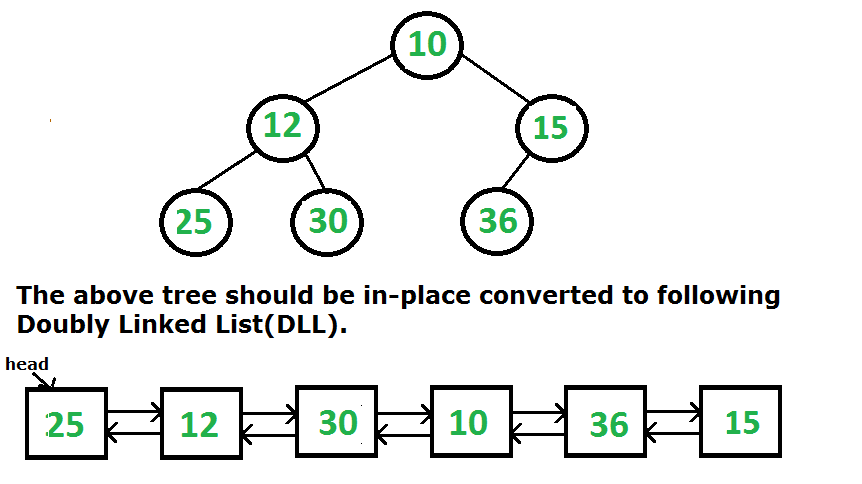

In [1]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def convert_to_dll(root):
    if root is None:
        return None

    # Convert the tree to DLL recursively
    head, tail = convert_tree_to_dll(root)

    return head

def convert_tree_to_dll(node):
    if node is None:
        return None, None

    # Convert the left subtree to DLL
    left_head, left_tail = convert_tree_to_dll(node.left)

    # Convert the right subtree to DLL
    right_head, right_tail = convert_tree_to_dll(node.right)

    # Create a new DLL node for the current node
    new_node = TreeNode(node.val)

    # Connect the left DLL to the current node
    if left_tail:
        left_tail.right = new_node
        new_node.left = left_tail
    else:
        left_head = new_node

    # Connect the right DLL to the current node
    if right_head:
        right_head.left = new_node
        new_node.right = right_head
    else:
        right_tail = new_node

    # Return the head and tail of the combined DLL
    return left_head, right_tail

# Test the code
root = TreeNode(10)
root.left = TreeNode(12)
root.right = TreeNode(15)
root.left.left = TreeNode(25)
root.left.right = TreeNode(30)
root.right.left = TreeNode(36)

head = convert_to_dll(root)

# Print the DLL in forward direction
current = head
while current is not None:
    print(current.val, end=" ")
    current = current.right

# Output: 25 12 30 10 36 15

25 12 30 10 36 15 

<aside>
💡 Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

Example1:
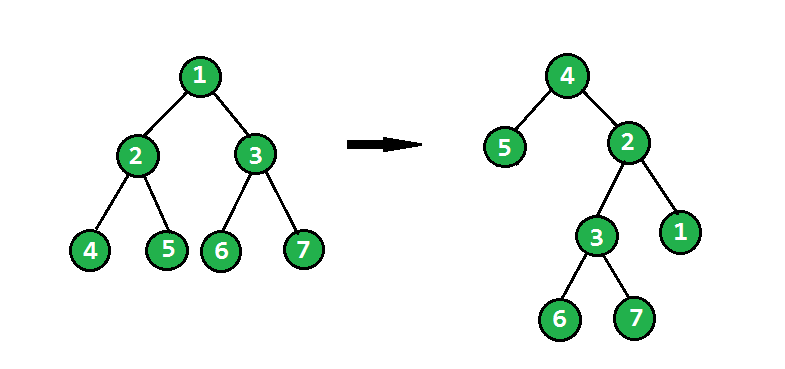
Example2:
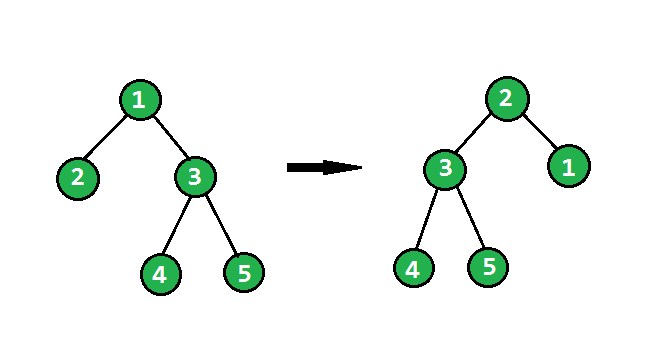

In [2]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def flip_binary_tree(root):
    if root is None:
        return None

    # Base case: leaf node
    if root.left is None and root.right is None:
        return root

    # Flip the left and right children
    flipped_left = flip_binary_tree(root.left)
    flipped_right = flip_binary_tree(root.right)

    # Update the left and right children
    root.left = flipped_right
    root.right = flipped_left

    return root

# Helper function to print the binary tree in the clockwise orientation
def print_binary_tree_clockwise(root, level=0):
    if root is None:
        return

    # Print the right subtree
    print_binary_tree_clockwise(root.right, level + 1)

    # Print the current node
    print(" " * 4 * level + str(root.val))

    # Print the left subtree
    print_binary_tree_clockwise(root.left, level + 1)

# Test the code
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

print("Original Binary Tree:")
print_binary_tree_clockwise(root)
print()

flipped_root = flip_binary_tree(root)

print("Flipped Binary Tree:")
print_binary_tree_clockwise(flipped_root)

# Test the code 2
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.right.left = TreeNode(4)
root.right.right = TreeNode(5)

print("Original Binary Tree:")
print_binary_tree_clockwise(root)
print()

flipped_root = flip_binary_tree(root)

print("Flipped Binary Tree:")
print_binary_tree_clockwise(flipped_root)

Original Binary Tree:
        7
    3
        6
1
        5
    2
        4

Flipped Binary Tree:
        4
    2
        5
1
        6
    3
        7
Original Binary Tree:
        5
    3
        4
1
    2

Flipped Binary Tree:
    2
1
        4
    3
        5


💡 Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:

        6
     /    \
    3      5
  /   \     \
 2     5     4
     /   \
    7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

In [3]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def print_root_to_leaf_paths(root):
    if root is None:
        return

    stack = [(root, str(root.val))]  # Initialize the stack with the root and its path

    while stack:
        node, path = stack.pop()

        if node.left is None and node.right is None:
            print(path)  # Print the path when a leaf node is reached
        else:
            if node.left:
                stack.append((node.left, path + "->" + str(node.left.val)))  # Add left child to the stack with updated path
            if node.right:
                stack.append((node.right, path + "->" + str(node.right.val)))  # Add right child to the stack with updated path

# Test the code
root = TreeNode(6)
root.left = TreeNode(3)
root.right = TreeNode(5)
root.left.left = TreeNode(2)
root.left.right = TreeNode(5)
root.right.left = TreeNode(None)
root.right.right = TreeNode(4)
root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

print("Root-to-leaf paths:")
print_root_to_leaf_paths(root)


Root-to-leaf paths:
6->5->4
6->5->None
6->3->5->4
6->3->5->7
6->3->2


<aside>
💡 Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes
Explanation : 

All of the above three traversals are of
the same tree 

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output : 

No

</aside>

In [4]:
def check_same_tree(inorder, preorder, postorder):
    if not inorder and not preorder and not postorder:
        return True

    if len(inorder) != len(preorder) or len(inorder) != len(postorder):
        return False

    if set(inorder) != set(preorder) or set(inorder) != set(postorder):
        return False

    if len(inorder) == 1 and len(preorder) == 1 and len(postorder) == 1:
        return inorder[0] == preorder[0] == postorder[0]

    root = preorder[0]
    root_index = inorder.index(root)

    left_inorder = inorder[:root_index]
    right_inorder = inorder[root_index + 1:]
    left_preorder = preorder[1:1 + len(left_inorder)]
    right_preorder = preorder[1 + len(left_inorder):]
    left_postorder = postorder[:len(left_inorder)]
    right_postorder = postorder[len(left_inorder):-1]

    return check_same_tree(left_inorder, left_preorder, left_postorder) and \
           check_same_tree(right_inorder, right_preorder, right_postorder)

# Test the code
inorder = [4, 2, 5, 1, 3]
preorder = [1, 2, 4, 5, 3]
postorder = [4, 5, 2, 3, 1]

if check_same_tree(inorder, preorder, postorder):
    print("Yes")
else:
    print("No")

# Test the code
inorder = [4, 2, 5, 1, 3]
preorder = [1, 5, 4, 2, 3]
postorder = [4, 1, 2, 3, 5]

if check_same_tree(inorder, preorder, postorder):
    print("Yes")
else:
    print("No")

Yes
No
